In [ ]:
!pip install fastf1

In [ ]:
import fastf1
import fastf1.plotting
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Load the race session
session = fastf1.get_session(2023, "Belgium", 'R')
session.load()
laps = session.laps

In [ ]:
drivers = session.drivers

In [ ]:
# Drivers abbreviations
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]

In [ ]:
# Stint length and compound used for every stint by every driver.
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

In [ ]:
# The number in the LapNumber column now means the stint length.
stints = stints.rename(columns={"LapNumber": "StintLength"})

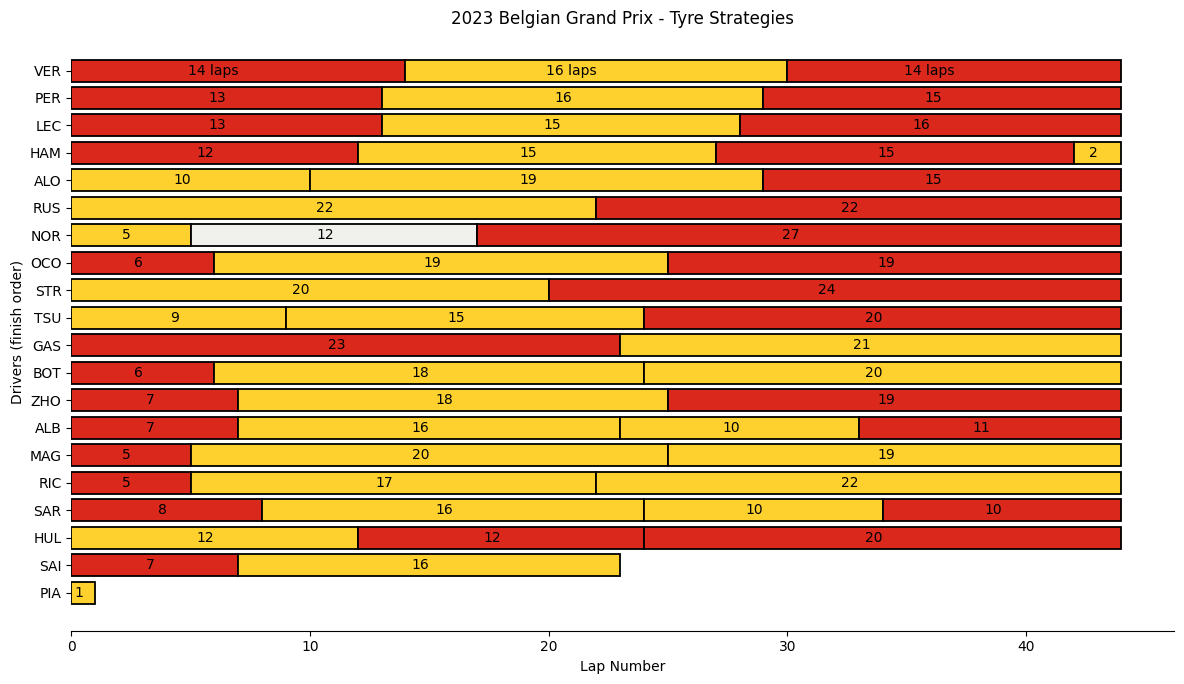

In [ ]:
# Now we can plot the strategies for each driver
fig, ax = plt.subplots(figsize=(12, 7))
plt.title(f"{session.event.year} {session.event.EventName} - Tyre Strategies")
sns.set(style="whitegrid")

# Bars configuration
for i, driver in enumerate(drivers):
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        comp_color = fastf1.plotting.COMPOUND_COLORS[row["Compound"]]
        plt.barh(y=i, width=row["StintLength"], left=previous_stint_end, color=comp_color, edgecolor="black", fill=True, linewidth=1.3)

        # Add laps in first bar
        label = str(row["StintLength"])
        if i == 0:
            label = f"{label} laps"

        plt.text(previous_stint_end + row["StintLength"] / 2, i, label, ha='right', va='center', fontsize=10, color='black')
        previous_stint_end += row["StintLength"]

# Axes settings
plt.yticks(range(len(drivers)), drivers)
plt.xlabel("Lap Number")
plt.ylabel("Drivers (finish order)")
plt.grid(False)
ax.invert_yaxis()

# Plot aesthetics
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()